## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")

In [2]:
posts_df = pd.read_csv('./data/combined_dirty.csv')

In [3]:
#Taking a quick peak at our columns, it looks like we should drop the Unnamed:0 column which we most likely picked up when we didn't drop an index when exporting our final dataframe from data collection
posts_df.head()

,Unnamed: 0,id,title,author,created_utc,subreddit,selftext
0,0,ostlf5,AITA for wanting money to fix my book?,TeamAbadonMC,1627414538,AmItheAsshole,"So, my little sister recently ripped the cover..."
1,1,ostkwc,AITA - Uninviting my Maid of Honor to my Wedding,Sufficient-Many-5697,1627414492,AmItheAsshole,To provide full context - 3000 isn't enough\n\...
2,2,ostkeh,AITA for not telling my partner about my famil...,angel_cherr,1627414445,AmItheAsshole,"So, this was a while ago, but I can't stop thi..."
3,3,ostiqa,AITA for leaving the group chat?,mediumrareperson,1627414283,AmItheAsshole,"So, excuse my bad grammar and bad formatting.\..."
4,4,ostidb,WIBTA if I didnt want my gf to come to a conce...,macncheesebitch,1627414249,AmItheAsshole,"So this is an ""Am I the Asshole"" + ""Am I being..."


In [4]:
posts_df.shape

(4300, 7)

## Data Cleaning

In [5]:
#Dropping 'Unnamed: 0' column
posts_df.drop(columns = ['Unnamed: 0', 'created_utc'], inplace = True)

### Removing Duplicates by 'id'

We may have duplicate posts, which is why we kept the id value, which should help us locate and drop duplicate posts

In [6]:
#This should return those in our dataframe that have duplicate ids, it appears there are none so Reddit may assign unique ids for each posts even if it's the same text
posts_df[posts_df.duplicated(['id'], keep = False)]

,id,title,author,subreddit,selftext


In [7]:
#It appears by using title, author, and subreddit as our subset, we can see there are duplicate posts by the same user. 

posts_df[posts_df.duplicated(subset = ['title', 'author', 'subreddit'], keep = False)]

,id,title,author,subreddit,selftext
9,ostgi2,AITA for not forgiving my friend 6 months afte...,Watermelonass12031,AmItheAsshole,"\n\nHi all\n\nSix months ago, after my HS gr..."
33,ossw57,AITA for not forgiving my friend 6 months afte...,Watermelonass12031,AmItheAsshole,[removed]
44,ossoun,AITA for going to see my best friend (/fwb) on...,itstrashtuesday,AmItheAsshole,"So, I (20f) have been friends with Mia (19f) f..."
51,ossm85,WIBTA for reporting simple assault,AssaultWIBTA-CA,AmItheAsshole,I live in Canada and was recently assaulted at...
75,ossbbn,"AITA for not wanting my sister to date my ""ex""?",sandrababy1989,AmItheAsshole,[removed]
...,...,...,...,...,...
4214,oquk00,I feel defeated and it’s my fault,Nick_Skye,offmychest,I’m only 21 so I’ve got plenty of time but I j...
4216,oqui9p,I feel defeated and it’s my fault,Nick_Skye,offmychest,[removed]
4220,oqucw1,I feel defeated and it’s my fault,Nick_Skye,offmychest,[removed]
4230,oqu2kw,I can't understand the US government's proppin...,-Harboringonalament-,offmychest,[removed]


In [8]:
#Here we are dropping the duplicate we see above, we will be dropping 299 rows
posts_df.drop_duplicates(subset = ['title', 'author', 'subreddit'], keep = 'first', inplace = True)

In [9]:
posts_df

,id,title,author,subreddit,selftext
0,ostlf5,AITA for wanting money to fix my book?,TeamAbadonMC,AmItheAsshole,"So, my little sister recently ripped the cover..."
1,ostkwc,AITA - Uninviting my Maid of Honor to my Wedding,Sufficient-Many-5697,AmItheAsshole,To provide full context - 3000 isn't enough\n\...
2,ostkeh,AITA for not telling my partner about my famil...,angel_cherr,AmItheAsshole,"So, this was a while ago, but I can't stop thi..."
3,ostiqa,AITA for leaving the group chat?,mediumrareperson,AmItheAsshole,"So, excuse my bad grammar and bad formatting.\..."
4,ostidb,WIBTA if I didnt want my gf to come to a conce...,macncheesebitch,AmItheAsshole,"So this is an ""Am I the Asshole"" + ""Am I being..."
...,...,...,...,...,...
4295,oqr5w4,I almost died on Wednesday,RedbeardRagnar,offmychest,Me and a friend had a kayak trip planned down ...
4296,oqr4wk,I don't know how to talk to people/spend time ...,heellpme,offmychest,My family told me a lot that I'm not easy to t...
4297,oqr4k0,Just a vent about some of my friends.,Balderdash_the_owl,offmychest,[removed]
4298,oqr482,Was he being inappropriate?,calm_in_chaos,offmychest,was he being inappropriate? or was it just me ...


### Removing Null Values

Since we're going to be mainly be looking at selftext and title, we will check to see if there are any NaN values for either

In [10]:
print(posts_df[posts_df.selftext.isnull()])

          id                                            title     author  \
1142  os85ti                       AITA for guilt tripping gf  [deleted]   
1174  os7krm  AITA for not taking my sister on my anniversary  [deleted]   
1329  os4pn2                            kekwuuwwuwuwiiwuwuwu2  [deleted]   
1881  orsdzx                           Xhcbfnfnfnfnfnfnnfbnjj  [deleted]   

          subreddit selftext  
1142  AmItheAsshole      NaN  
1174  AmItheAsshole      NaN  
1329  AmItheAsshole      NaN  
1881  AmItheAsshole      NaN  


In [11]:
posts_df[posts_df.title.isnull()]

,id,title,author,subreddit,selftext


It appears Reddit doesn't store any null values for titles if any user happens to not include it in their submission. For now, we will drop these rows as two of them appear to be inconsistent with the subreddit while all of them have no selftext.

In [12]:
#Dropping rows with NaN values
posts_df.dropna(axis = 0, inplace = True)

In [13]:
#Checking to see that the correct number of rows have been dropped, which should be 4
posts_df.shape

(4133, 5)

### Removing Posts with [Removed] Selftext

After creating the final dataframe by concatenating the posts, I could not help but notice that there were a lot of posts (particularly in the AmItheAsshole subreddit) that had selftext with the '[removed]' tag. This may indicate posts that moderators may have deleted the text for, or were mistakenly uploaded. We did see that there were a few duplicated posts with no selftext. Let's check the number of each of these in each subreddit.

In [14]:
posts_df[(posts_df['selftext'] == '[removed]') & (posts_df['subreddit'] == 'AmItheAsshole')]

,id,title,author,subreddit,selftext
5,ostibe,Am I the Asshole for not wanting to go to vaca...,Cat_Gaming14,AmItheAsshole,[removed]
12,ostdle,"AITA for being a good person,helping everyone,...",big_brain_time_2,AmItheAsshole,[removed]
14,ostczu,AITA for stepping away from a friendship with ...,joshamiltonn,AmItheAsshole,[removed]
17,ostbl5,My grandma made me and my two cousins pick up ...,Fry_em_up_fan,AmItheAsshole,[removed]
24,ost6ah,Am I the asshole for texting my manager on her...,ZealousidealCar2836,AmItheAsshole,[removed]
...,...,...,...,...,...
2190,ornslw,Sita for asking my gf to delete the person she...,Corbs48,AmItheAsshole,[removed]
2193,ornrom,AITA for telling my mother to stop complaining?,ToastyBathBomb69,AmItheAsshole,[removed]
2196,ornoa3,AITA For not staying in contact with my homele...,Jess5701jm,AmItheAsshole,[removed]
2197,orno2t,Strap in folks- AITA?,The_Bearded_Mage,AmItheAsshole,[removed]


In [15]:
posts_df[(posts_df['selftext'] == '[removed]') & (posts_df['subreddit'] == 'offmychest')]

,id,title,author,subreddit,selftext
2224,ossy5k,I am terrified of getting rejected for my scars,WhaleShark2,offmychest,[removed]
2233,ossqq9,I apparently hurt a woman’s feelings and I gue...,Alternative-Newt7059,offmychest,[removed]
2235,ossq0x,"GF became morbidly obese, considering end of r...",obvious2nd,offmychest,[removed]
2258,osrtyu,Straight guy dating men because I'm so lonely ...,ItmeSlugs,offmychest,[removed]
2260,osrsdu,I have my death planned because I'm constantly...,throwawayplannedtime,offmychest,[removed]
...,...,...,...,...,...
4271,oqse7c,Something is wrong with my brother and I’m tir...,a1true1idiot,offmychest,[removed]
4274,oqs8yd,My neighbor is a piece is shit,keepitlowkeyyy,offmychest,[removed]
4280,oqrxrx,TW: body dysmorphia,throwaway000975336g,offmychest,[removed]
4290,oqrfcc,rethinking my life while on holiday,leepictmeymey,offmychest,[removed]


Querying both these snapshots, we can see that there is a disparity between the number of posts with '[removed]' selftext in the subreddits. We will have to keep this in mind and we may possibly have to shave off a few rows from the posts coming from 'offmychest'.

In [16]:
posts_df = posts_df[posts_df['selftext'] != '[removed]']

In [17]:
posts_df[posts_df.subreddit == 'AmItheAsshole']

,id,title,author,subreddit,selftext
0,ostlf5,AITA for wanting money to fix my book?,TeamAbadonMC,AmItheAsshole,"So, my little sister recently ripped the cover..."
1,ostkwc,AITA - Uninviting my Maid of Honor to my Wedding,Sufficient-Many-5697,AmItheAsshole,To provide full context - 3000 isn't enough\n\...
2,ostkeh,AITA for not telling my partner about my famil...,angel_cherr,AmItheAsshole,"So, this was a while ago, but I can't stop thi..."
3,ostiqa,AITA for leaving the group chat?,mediumrareperson,AmItheAsshole,"So, excuse my bad grammar and bad formatting.\..."
4,ostidb,WIBTA if I didnt want my gf to come to a conce...,macncheesebitch,AmItheAsshole,"So this is an ""Am I the Asshole"" + ""Am I being..."
...,...,...,...,...,...
2191,orns21,AITA for being upset my bf is going on vacatio...,LadySiobhan,AmItheAsshole,"Okay so I’ve been with my guy for 1.5 years, o..."
2192,ornrw2,AITA for Bowing Out of my Friend’s Bachelorett...,brookey126,AmItheAsshole,"Hi everyone, need some clarity here! A friend ..."
2194,ornqzl,AITA for not opening the door for my stepbrother?,IsitToeeathome,AmItheAsshole,I have a new step brother and while we were ne...
2195,ornoza,AITA for wearing the same Halloween as my frie...,tirerlabrise,AmItheAsshole,My friend’s GF and I had the same Halloween co...


In [18]:
posts_df[posts_df['subreddit'] == 'offmychest']

,id,title,author,subreddit,selftext
2200,ostldw,Since when bullying is a way of joking?,Suzyshtal,offmychest,I was bullied by a group of boys online becaus...
2201,ostkrj,"I really want to work at this company, and wai...",newtons_apprentice,offmychest,I'm so excited about this opportunity. The int...
2202,ostk97,So my HS crush was my physiotherapist today...,dense_block_9933,offmychest,I injured myself in a previous incident and de...
2203,ostjjo,I got into Columbia,Kate032,offmychest,Here’s something positive! I won’t be telling ...
2204,ostilr,I Hate Being Disabled and I Wish I Did More Wh...,Gardevoir234,offmychest,I've had chronic lower back pain for years and...
...,...,...,...,...,...
4294,oqr5zh,My (19M) life has been turning to hell and I d...,NefariousSimbaO,offmychest,"Recently my mom passed away due to covid, whic..."
4295,oqr5w4,I almost died on Wednesday,RedbeardRagnar,offmychest,Me and a friend had a kayak trip planned down ...
4296,oqr4wk,I don't know how to talk to people/spend time ...,heellpme,offmychest,My family told me a lot that I'm not easy to t...
4298,oqr482,Was he being inappropriate?,calm_in_chaos,offmychest,was he being inappropriate? or was it just me ...


For the sake if it being equal in terms of what we fit our model on, we will drop rows at the bottom of the dataframe to account for the disparity between the posts in 'AmItheAsshole' and those in 'offmychest'. 

In [19]:
posts_df.drop(posts_df.tail(459).index, inplace = True)

In [20]:
posts_df.shape

(2672, 5)

#### Frequent Posters

Let's check to see if there are very frequent posters in any of the subreddits. We don't expect to see many due to the personal nature of these subreddits and how we collected the submission, but if we do see any frequent posters they may be spammers.

In [21]:
#Creating a dataframe that adds up the count of any repeating authors and only the top 10. 
poster_count = pd.DataFrame(posts_df['author'].value_counts().head(10))

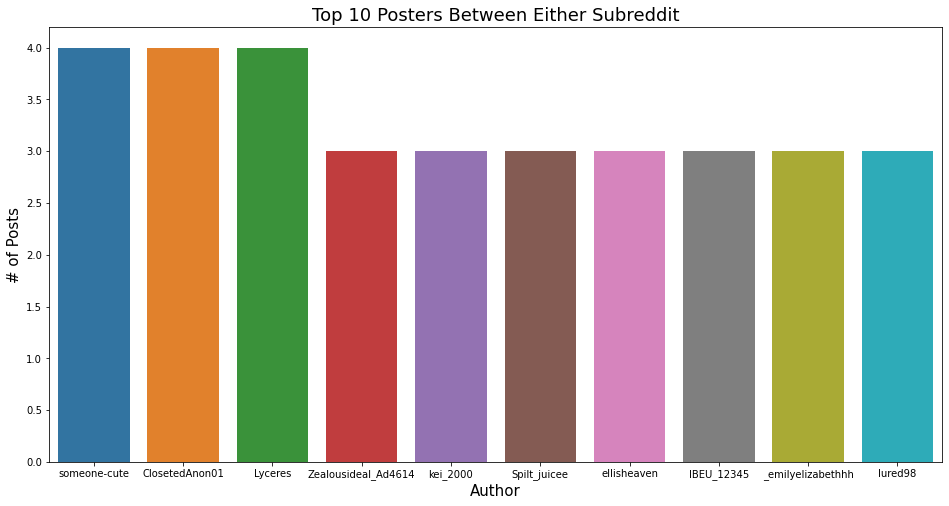

In [22]:
plt.figure(figsize = (16,8))
sns.barplot(data = poster_count, 
            x = poster_count.index, 
            y = poster_count['author'])
plt.title('Top 10 Posters Between Either Subreddit', size = 18)
plt.xlabel('Author', size = 15)
plt.ylabel('# of Posts', size = 15);

As we expected, we do not see anyone with a huge amount of posts in a relatively short amount of time. Maybe in a subreddit where people are farming 'karma' by mass-posting images or common and agreeable observations would we see a large amount of posts by the same user in a short amount of time. However, it is important to note that on Reddit, there are also many users that 'lurk', which means to browse the subreddits and not post at all, so it's really the minority of users that post. 

### Setting Subreddit Column as Binary Target

In [23]:
#Mapping our subreddit column such that they are in binary values
posts_df['subreddit'] = posts_df['subreddit'].map({
    'AmItheAsshole' : 0,
    'offmychest'    : 1
})

In [24]:
#Looking at the distribution of our target value, which will be our baseline model
posts_df.subreddit.value_counts(normalize= True)

0    0.5
1    0.5
Name: subreddit, dtype: float64

### Dropping Unneeded Columns and Re-Ordering 

In [25]:
posts_df

,id,title,author,subreddit,selftext
0,ostlf5,AITA for wanting money to fix my book?,TeamAbadonMC,0,"So, my little sister recently ripped the cover..."
1,ostkwc,AITA - Uninviting my Maid of Honor to my Wedding,Sufficient-Many-5697,0,To provide full context - 3000 isn't enough\n\...
2,ostkeh,AITA for not telling my partner about my famil...,angel_cherr,0,"So, this was a while ago, but I can't stop thi..."
3,ostiqa,AITA for leaving the group chat?,mediumrareperson,0,"So, excuse my bad grammar and bad formatting.\..."
4,ostidb,WIBTA if I didnt want my gf to come to a conce...,macncheesebitch,0,"So this is an ""Am I the Asshole"" + ""Am I being..."
...,...,...,...,...,...
3744,or9r1t,My life is empty and monotonous.,jaqenpetrucci,1,The title says it all. I feel my life is monot...
3745,or9prv,Woke up to my period starting this morning. Cr...,vettechrockstar86,1,I'll never be a mom.
3746,or9pke,My boyfriend's mom may not like me as much as ...,Old_Presentation_520,1,"So for context, my bf is half Filipino, and he..."
3747,or9lyc,My brother was laid off. And i let him use my ...,No_Character_2079,1,The car in question is a 1994 Toyota MR2 GT-S ...


### Cleaning the Titles and Selftext

For now, I will use a normal pandas feature to replace any non-letters with ''. I will then append the selftext to the title so that we will be working with one less column. 

In [26]:
#Using pandas replace function to replace any non-letters and numbers
posts_df['clean_title'] = posts_df['title'].str.replace('[^a-zA-Z0-9 ]', '')
posts_df['clean_text'] = posts_df['selftext'].str.replace('[^a-zA-Z0-9 ]', '')

In [28]:
#Combining title and selftext, we will also drop these columns
posts_df['text'] = posts_df['clean_title'] + ' ' + posts_df['clean_text']

#Dropping all columns other than text and subreddit
posts_df.drop(['title', 'selftext', 'clean_title', 'clean_text', 'id', 'author'], axis = 1, inplace = True)

In [29]:
#Resetting index
posts_df.reset_index(drop = True, inplace = True)

### Exporting Data for Preprocessing & Modeling 

In [30]:
#Savings our final dataframe to a .csv we will use for 
posts_df.to_csv('./data/clean_data.csv', index = False)

In [32]:
#Taking a look at what our text looks like after combining our title and selftext
posts_df['text'][8]

'AITA for not forgiving my friend 6 months after a falling out over Mario Kart   Hi allSix months ago after my HS grad 3 friends and I were drinking and celebrating We got high which I am okay with however I do have some anxiety so I dont like it in largeunfamiliar groups However I felt very safe and comfortable with my close friendsLater we were playing Mario Kart which we were all getting into I was winning a bit and making some bold claims about my status as winner I thought they knew I was bragging in good faith and meant no offense I was calling them all suckas and bantering and one of the friends Joel 18M wasnt doing too hot on the racetrack Joel suddenly tuned on me and yelled quite loud saying all I do is brag which I initially smiled at because I am not competitive at all I was just having fun But he turned darker and started saying some awful things He told me he didnt like me at all saying I had always been frustrating and annoying all through HS I didnt know what to do I wa